In [53]:
f = open("csvs/Oxypoda opaca.tsv", "r",encoding='latin1')
lines = f.readlines()
#print(lines)
len(lines)

84

In [54]:
first_csv = ""
for i in range(0,len(lines),2):
    first_csv+=(lines[i])
second_csv = ""
for i in range(1,len(lines),2):
    second_csv+=(lines[i])
    
from io import StringIO
first_csv = StringIO(first_csv)
second_csv = StringIO(second_csv)
import pandas as pd
df1 = pd.read_csv(first_csv,sep='\t')
df2 = pd.read_csv(second_csv,sep='\t')

In [55]:
df1.index = df2.index
df = df1.join(df2)

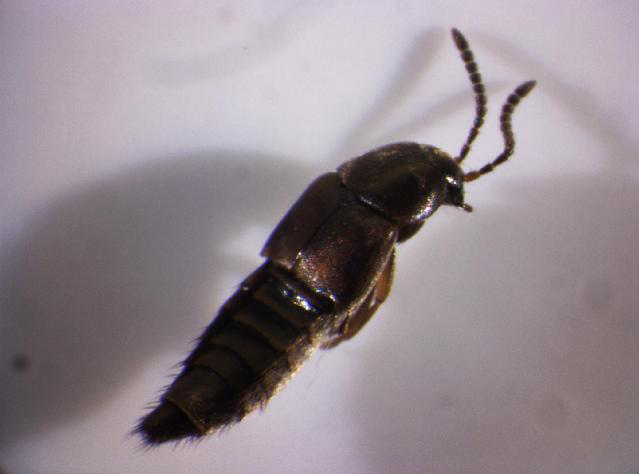

In [56]:
from PIL import Image
import requests
from io import BytesIO
url = df.head()['image_urls'][4]
response = requests.get(url)
img = Image.open(BytesIO(response.content))
from IPython.display import display
display(img)

In [5]:
df.head()

,processid,sampleid,recordID,catalognum,fieldnum,institution_storing,bin_uri,phylum_taxID,phylum_name,class_taxID,...,image_ids,image_urls,copyright_licenses,trace_ids,trace_links,run_dates,sequencing_centers,directions,seq_primers,marker_codes
0,EUCAR584-10,ZFMK_COL_2010_798,1796932,ZFMK_COL_2010_798,ZFMK_COL_2010_798,Zoologisches Forschungsmuseum Alexander Koenig,BOLD:AAO0357,20,Arthropoda,82,...,1257569.0,http://v3.boldsystems.org/pics/EUCAR/ZFMK_COL_...,CreativeCommons - Attribution Non-Commercial S...,2821108|2821093,http://trace.boldsystems.org/traceIO/bold.org/...,2011-03-15 23:17:38|2011-03-15 21:51:10,Centre for Biodiversity Genomics|Centre for Bi...,R|F,C_LepFolR|C_LepFolF,COI-5P|COI-5P
1,FBCOB091-10,BC ZSM COLA 00186,1600191,BFB_Col_LH_0186,,"SNSB, Zoologische Staatssammlung Muenchen",BOLD:AAO0357,20,Arthropoda,82,...,873420.0,http://v3.boldsystems.org/pics/FBCOB/BCZSMCOLA...,CreativeCommons - Attribution Non-Commercial S...,2427403|2427390,http://trace.boldsystems.org/traceIO/bold.org/...,2010-10-09 15:22:45|2010-10-09 13:56:14,Centre for Biodiversity Genomics|Centre for Bi...,R|F,M13R|M13F,COI-5P|COI-5P
2,FBCOH654-12,BFB_Col_FK_5973,2952415,BFB_Col_FK_5973,11.06.12-hd1,"SNSB, Zoologische Staatssammlung Muenchen",BOLD:AAO0357,20,Arthropoda,82,...,1846867.0,http://v3.boldsystems.org/pics/FBCOH/BFB_Col_F...,CreativeCommons - Attribution Non-Commercial S...,4786151|4786091,http://trace.boldsystems.org/traceIO/bold.org/...,2013-01-17 19:17:52|2013-01-17 17:45:57,Centre for Biodiversity Genomics|Centre for Bi...,R|F,C_LepFolR|C_LepFolF,COI-5P|COI-5P
3,FBCOH655-12,BFB_Col_FK_5974,2952416,BFB_Col_FK_5974,11.06.12-hd1,"SNSB, Zoologische Staatssammlung Muenchen",BOLD:AAO0357,20,Arthropoda,82,...,1846868.0,http://v3.boldsystems.org/pics/FBCOH/BFB_Col_F...,CreativeCommons - Attribution Non-Commercial S...,4786152|4786092,http://trace.boldsystems.org/traceIO/bold.org/...,2013-01-17 19:17:52|2013-01-17 17:45:57,Centre for Biodiversity Genomics|Centre for Bi...,R|F,C_LepFolR|C_LepFolF,COI-5P|COI-5P
4,FBCOJ819-13,BCZSM_COLA_01674,3082660,BCZSM_COLA_01674,BCZSM_COLA_01674,"SNSB, Zoologische Staatssammlung Muenchen",BOLD:AAO0357,20,Arthropoda,82,...,1884034.0,http://v3.boldsystems.org/pics/FBCOJ/BCZSM_COL...,CreativeCommons - Attribution Non-Commercial S...,4837220|4837125,http://trace.boldsystems.org/traceIO/bold.org/...,2013-02-14 22:34:00|2013-02-14 21:01:51,Centre for Biodiversity Genomics|Centre for Bi...,F|R,C_LepFolF|C_LepFolR,COI-5P|COI-5P


In [8]:
import os 
from io import StringIO
import pandas as pd
def parse_csvs():
    final_df = pd.DataFrame()
    for filename in os.listdir('csvs/'):
        file_in = open('csvs/'+filename, "r",encoding='latin1')
        lines = file_in.readlines()
        #df.head()
        #print(filename)
        first_csv = ""
        for i in range(0,len(lines),2):
            first_csv+=(lines[i])
        second_csv = ""
        for i in range(1,len(lines),2):
            second_csv+=(lines[i])
            
        first_csv = StringIO(first_csv)
        second_csv = StringIO(second_csv)
        try:
            df1 = pd.read_csv(first_csv,sep='\t')
            df2 = pd.read_csv(second_csv,sep='\t')
            df1.index = df2.index
            df = df1.join(df2)
            final_df = pd.concat([final_df,df])
        except:
            print(filename)

            
        
    return final_df
final_df = parse_csvs()
final_df.shape
final_df = final_df[useful_column_names]
final_df.head()
final_df.shape
final_df = final_df.dropna(subset=['image_urls'])
final_df.to_csv("final.csv")

Helina troene.tsv
Toxomerus marginatus.tsv


In [ ]:
from PIL import Image
import requests
from io import BytesIO

useful_column_names = ['processid','order_name','family_name','subfamily_name','genus_name','species_name','nucleotides','image_urls'] 


missing = []
for index, row in final_df.iterrows():
    print(index)
    urls = row['image_urls'].split('|')

    #print(row['processid'])
    for url in urls:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img.save('downloaded_images/'+row['processid']+'.jpg')
        except:
            missing.append((url,row));
            print(url)
            print(row['processid'])
    #print(row['processid'], ",",row['order_name'])

0
1
2
3
4
5
7
33
35
36
37
38
58
59
60
0
1
2
3
4
7
8
9
11
12
13
15
18
19
20
21
22
23
24
26
27
28
29
30
31
32
33
34
35
36
0
1
2
3
4
7
10
23
25
26
29
30
31
32
39
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
5
6
7
10
11
25
26
31
32
33
34
35
49
50
51
53
0
12
13
14
16
17
22
35
36
39
40
41
42
50
0
3
4
5
22
23
24
25
26
27
28
29
30
33
34
35
36
38
39
40
41
42
50
51
52
53
54
55
56
58
60
61
62
63
64
67
68
70
71
72
74
75
76
77
78
79
81
83
84
86
87
88
89
90
102
103
104
105
107
109
111
112
113
114
115
120
121
122
124
125
126
127
0
1
2
3
4
5
6
7
8
9
13
14
15
16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
1
2
3
4
5
7
8
9
22
25
27
28
29
30
31
34
38
0
1
2
3
4
5
6
7
8
9
10
11
12
14
15
16
17
18
19
20
21
22
23
24
25
27
28
29
30
31
32
33
34
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
90
91
92
93
94
95
96
97
98
99
100
102
103
104
105
106
107
108
109
112
113
http://v3.boldsystems.org/pics/MHMYK/14-SRNP-

In [7]:
missing

processid                                       DTNHM1713-21
sampleid                                           013571413
recordID                                            12904850
catalognum                                         013571413
fieldnum                                           013571413
institution_storing           Natural History Museum, London
bin_uri                                                     
phylum_taxID                                              20
phylum_name                                       Arthropoda
class_taxID                                               82
class_name                                           Insecta
order_taxID                                              413
order_name                                        Coleoptera
family_taxID                                            1168
family_name                                       Dytiscidae
subfamily_taxID                                       305157
subfamily_name          

In [77]:
asd = pd.read_csv('final.csv',index_col=0)

In [78]:
asd

,processid,order_name,family_name,subfamily_name,genus_name,species_name,nucleotides,image_urls
0,COLFA616-12,Coleoptera,Dytiscidae,Agabinae,Ilybius,Ilybius ater,AACTTTATATTTTATTTTTGGTGCTTGAGCTGGAATAGTAGGTACC...,http://v3.boldsystems.org/pics/COLFA/ZMUO.0007...
1,COLFE402-12,Coleoptera,Dytiscidae,Agabinae,Ilybius,Ilybius ater,AACTTTATATTTTATTTTTGGTGCTTGAGCTGGAATAGTAGGTACC...,http://v3.boldsystems.org/pics/COLFE/ZMUO.0049...
2,COLFE768-13,Coleoptera,Dytiscidae,Agabinae,Ilybius,Ilybius ater,AACTTTATATTTTATTTTTGGTGCTTGAGCTGGAATAGTAGGTACC...,http://v3.boldsystems.org/pics/COLFE/ZMUO.0056...
3,COLFF144-13,Coleoptera,Dytiscidae,Agabinae,Ilybius,Ilybius ater,AACTTTATATTTTATTTTTGGTGCTTGAGCTGGAATAGTAGGTACC...,http://v3.boldsystems.org/pics/COLFF/ZMUO.0037...
4,CONOR061-14,Coleoptera,Dytiscidae,Agabinae,Ilybius,Ilybius ater,AACTTTATATTTTATTTTTGGTGCTTGAGCTGGAATAGTAGGTACC...,http://v3.boldsystems.org/pics/CONOR/DSC_0655+...
...,...,...,...,...,...,...,...,...
50,BBCCA484-12,Coleoptera,Carabidae,Harpalinae,Poecilus,Poecilus chalcites,AACTTTATATTTTATTTTTGGTGCATGATCAGGAATAGTAGGAACT...,http://v3.boldsystems.org/pics/BBCCA/IMG_9013+...
51,BBCCA495-12,Coleoptera,Carabidae,Harpalinae,Poecilus,Poecilus chalcites,AACTTTATATTTTATTTTTGGTGCATGATCAGGAATAGTAGGAACT...,http://v3.boldsystems.org/pics/BBCCA/IMG_9027+...
65,COSO009-08,Coleoptera,Carabidae,Harpalinae,Poecilus,Poecilus chalcites,AACTTTATATTTTATTTTTGGTGCATGATCAGGAATAGTAGGAACT...,http://v3.boldsystems.org/pics/TTCFW/IMG_2878+...
70,USCOC609-10,Coleoptera,Carabidae,Harpalinae,Poecilus,Poecilus chalcites,AACTTTATATTTTATTTTTGGTGCATGATCAGGAATAGTAGGAACT...,http://v3.boldsystems.org/pics/USCOC/IMG_4378+...
